# Lektion 2 - Aufgabentext

Der zu bearbeitende Aufgabentext lautet:
> In einer Mathearbeit, bei der maximal 10 Punkte erreicht werden konnten, haben 50
Schüler teilgenommen. Die Beobachtungswerte sind: 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4,
4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9,
10, 10. Der Lehrer möchte das Ergebnis gerne statistisch auswerten. Sie können ihm
bei dieser Aufgabe helfen, indem Sie das Ihnen bisher bekannte Instrumentarium
anwenden. Hinweis: Es konnten nur ganze Punkte verteilt werden.

# Notwendige Python-Bibliotheken

**Allgemein**  
Python bringt sogenannte "built-in"-Funktionen mit, welche nicht über Bibliotheken importiert oder selbst geschrieben werden müssen; hierzu gehören z.B. "len" (Länge einer Sequenz) und "sum" (Summe einer Sequenz).  
Weitere benötigte Funktionen müssen entweder über eine Bibliothek importiert oder sie müssen selbst geschrieben werden.
Für die Berechnung von Wurzeln benötigen wir die Bibliothek "math".
Für die Berechnung der Ergebnisse der eigentlichen Aufgaben (z.B. des Mittelwerts) schreiben wir selbst Funktionen.

In [1]:
import math

# Erstellung der Daten

Die Rohdaten speichern wir in Form einer Python-Liste.

In [2]:
data = [0, 
        1, 1, 1, 
        2, 2, 2, 2, 
        3, 3, 
        4, 4, 4, 4, 4, 
        5, 5, 5, 5, 5, 5, 
        6, 6, 6, 6, 6, 6, 6, 6, 
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 
        8, 8, 8, 8, 
        9, 9, 9, 9, 9,
        10, 10]

# Lösung - Variante 1: Berechnung aus den Rohdaten

## Mittelwert

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^n{x_i} $$

Die Länge einer Liste (d.h. in diesem Fall die Anzahl n der Beobachtungen) können wir mit der Funktion "len" ermitteln.  
Die Summe der Werte einer Liste können wir mit der Funktion "sum" ermitteln.

In [3]:
def mean(values):
    """Berechne den Mittelwert einer Liste von Beobachtungswerten.
    """
    n = len(values)
    sum_ = sum(values)
    return 1 / n * sum_

In [4]:
mean(data)

5.64

## Mittlere absolute Abweichung MAD

$$ MAD = \frac{1}{n} \sum_{i=1}^n{ \mid x_i - \bar{x} \mid } $$

Zur Berechnung des Mittelwerts verwenden wird die oben definierte Funktion "mean".  
Den Absolutwert berechnen wir mit der Built-In-Funktion "abs".

In [5]:
def mad(values):
    """Berechne die mittlere absolute Abweichung einer Liste von Beobachtungswerten.
    """
    n = len(values)
    x_quer = mean(values)
    sum_ = sum([abs(i - x_quer) for i in values])
    return 1 / n * sum_

In [6]:
mad(data)

2.0576

## Varianz

$$ s^2 = \frac{1}{n} \sum_{i=1}^n{ (x_i - \bar{x})^2 } $$

Hier greifen wir ebenfalls auf die oben erstellte Funktion "mean" zurück.

In [7]:
def var(values):
    """Berechne die Varianz einer Liste von Beobachtungswerten.
    """
    n = len(values)
    x_quer = mean(values)
    sum_ = sum([(i - x_quer)**2 for i in values])
    return 1 / n * sum_

In [8]:
var(data)

6.310400000000006

## Standardabweichung

$$ s = \sqrt{s^2} $$

Für die Berechnung der Standardabweichung benötigen wir eine Wurzelfunktion "sqrt". Diese ist in der oben importierten Bibliothek "math" vorhanden. Die Varianz haben wir bereits definiert.

In [9]:
def stdev(values):
    """Berechne die Standardabweichung einer Liste von Beobachtungswerten.
    """
    s2 = var(values)
    return math.sqrt(s2)

In [10]:
stdev(data)

2.512050954897214

# Lösung - Variante 2: Berechnung aus der Häufigkeitsverteilung

Für die Berechnung der Häufigkeitsverteilung definieren wir eine Funktion, welche aus einer Liste von Werten ein Dictionary erzeugt, welches für jeden Wert in den Rohdaten die zugehörige Häufigkeit liefert.

In [11]:
def haeufigkeitsverteilung(values):
    """Berechne ein Dictionary mit der Häufigkeitsverteilung für eine Liste von Beobachtungswerten.
    """
    haeuf = {}
    for i in values:
        if i in haeuf:
            haeuf[i] = haeuf[i] + 1
        else:
            haeuf[i] = 1
    return haeuf

In [12]:
haeuf = haeufigkeitsverteilung(data)
haeuf

{0: 1, 1: 3, 2: 4, 3: 2, 4: 5, 5: 6, 6: 8, 7: 10, 8: 4, 9: 5, 10: 2}

Die "Schlüssel" bzw. Werte der Häufigkeitsverteilung erhalten wir mit der Methode *keys*.

In [13]:
haeuf.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

Die Werte des Dictionaries - in unserem Fall entsprechen diese den Häufigkeiten - erhalten wir mit der Methode *values*.

In [14]:
haeuf.values()

dict_values([1, 3, 4, 2, 5, 6, 8, 10, 4, 5, 2])

Bei den Funktionen für Variante 2 hängen wir ein "haeuf" an, um diese von den Funktionen zu unterscheiden, welche direkt mit den Rohdaten bzw. einer Liste arbeiten.

## Mittelwert

$$ \bar{x} = \frac{1}{n} \sum_{j = 1}^m{ h(x_j)x_j } $$

In [15]:
def mean_haeuf(dhaeuf):
    """Berechne den Mittelwert aus einem Dictionary mit einer Häufigkeitsverteilung.
    """
    n = sum(dhaeuf.values())
    merkmale = dhaeuf.keys()
    sum_ = sum([dhaeuf[i] * i for i in merkmale])
    return 1 / n * sum_

In [16]:
mean_haeuf(haeufigkeitsverteilung(data))

5.64

## Varianz

$$ s^2 = \frac{1}{n} \sum_{j = 1}^m{ h(x_j)(x_j - \bar{x})^2 } $$

In [17]:
def var_haeuf(dhaeuf):
    """Berechne die Varianz aus einem Dictionary mit einer Häufigkeitsverteilung.
    """
    n = sum(dhaeuf.values())
    x_quer = mean_haeuf(dhaeuf)
    merkmale = dhaeuf.keys()
    sum_ = sum([dhaeuf[i] * ((i - x_quer)**2) for i in merkmale])
    return 1 / n * sum_

In [18]:
var_haeuf(haeufigkeitsverteilung(data))

6.310400000000001

## Standardabweichung

$$ s = \sqrt{s^2} $$

In [19]:
def stdev_haeuf(dhaeuf):
    """Berechne die Standardabweichung aus einem Dictionary mit einer Häufigkeitsverteilung.
    """
    s2 = var_haeuf(dhaeuf)
    return math.sqrt(s2)

In [20]:
stdev_haeuf(haeufigkeitsverteilung(data))

2.512050954897213

# Grafik

Für die Erstellung der Grafik benötigen wird die Bibliothek *matplotlib*.

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

In [22]:
x_values = list(haeuf.keys())
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [23]:
y_values = list(haeuf.values())
y_values

[1, 3, 4, 2, 5, 6, 8, 10, 4, 5, 2]

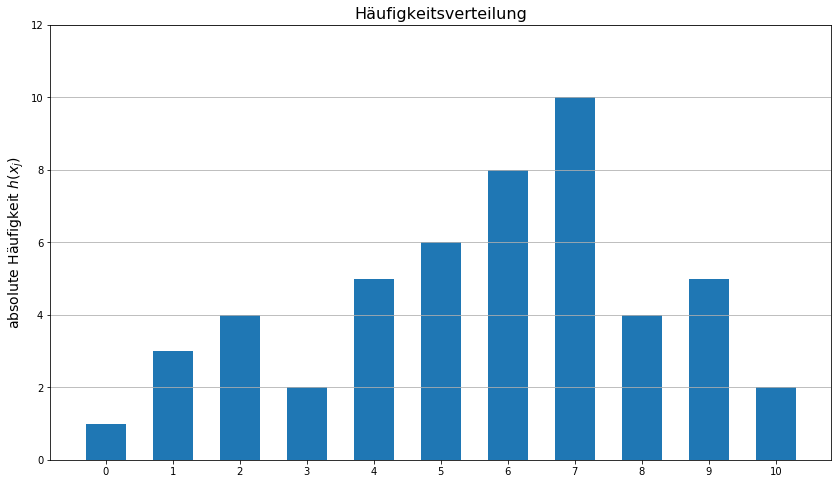

In [33]:
plt.figure(figsize=(14, 8))
plt.bar(x=x_values, height=y_values, width=0.6)
plt.title('Häufigkeitsverteilung', size=16)
plt.ylabel('absolute Häufigkeit $h(x_j)$', size=14)
plt.xticks(x_values)
plt.grid(True, axis='y')
plt.ylim((0, 12))
plt.show()

# ========== Anhang ==========

## Überprüfung der definierten Daten mit den Vorgaben bzw. der Aufgabenstellung

In [25]:
assert len(data) == 50, 'Anzahl Beobachtungen ist 50'
assert sum(data) == 282, 'Summe der Datenpunkte ist 282'

In [26]:
mean_ = sum(data) / len(data)
assert round(sum([i - mean_ for i in data]), 4) == 0, 'Summe der Abweichungen ist 0'
assert round(sum([abs(i - mean_) for i in data]), 4) == 102.88, 'Summe der absoluten Abweichungen ist 102.88'
assert round(sum([(i - mean_)**2 for i in data]), 4) == 315.52, 'Summe der quadrierten Abweichungen ist 315.52'

## Vergleich der selbst definierten Funktionen mit numpy-/scipy-Funktionen

In [27]:
import numpy as np
from scipy import stats

In [28]:
np.mean(data) == mean(data)

True

In [29]:
round(np.var(data), 4) == round(var(data), 4)

True

In [30]:
round(np.std(data), 4) == round(stdev(data), 4)

True

## Validierung der Ergebnisse der Häufigkeitsfunktion

In [31]:
assert sum(haeuf.values()) == 50, 'Summe der Beobachtungen ist 50'
assert sum([haeuf[i] * i for i in haeuf]) == 282, 'Summe der Datenpunkte ist 282'